<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_Flood/blob/master/2_Depthgrid_Raster_coastal_noncoastal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FEMA Depth Grid (Raster Data)**


Type of Layer 
*   10001C: Kent County
*   10003C: New Castle County
*   10005C: Sussex County
*   **WSE**: Water Surface Elevation grid 

Flood hazard is defined by a relation between depth of flooding and the annual chance of inundation greater than that depth.

Depth grid is defined by **the percent annual chance floods**. This is usually only **the 1% annual chance flood**.


*   CstDpth_01pct : Raster dataset of flood depth for a coastal 1% event
*   Depth_01pct : Raster dataset of flood depth for a 1% event
*   Depth_02pct : Raster dataset of flood depth for a 2% event
*   Depth_04pct : Raster dataset of flood depth for a 4% event
*   Depth_10pct : Raster dataset of flood depth for a 10% event
*   Depth_0_2pct : Raster dataset of flood depth for a 0.2% event
*   Depth_01plus : Raster dataset of flood depth for a 1% plus event
*   Hillshade : Raster dataset for the hillshade of the watershed shown on the FRM
*   Pct30yrChance : Raster dataset of the Percent 30yr Chance Grid
*   PctAnnChance : Raster dataset of the Percent Annual Chance Grid
*   WSE_01pct : Raster dataset of the water surface for a 1% event
*   WSE_02pct : Raster dataset of the water surface for a 2% event
*   WSE_04pct : Raster dataset of the water surface for a 4% event
*   WSE_10pct : Raster dataset of the water surface for a 10% event
*   WSE_0_2pct : Raster dataset of the water surface for a 1% plus event
*   WSE_01plus : Raster dataset of the water surface for a 1% plus event



To get the average depth in a census tract:

1) for each pixel, determine lat and lon

2) for each pixel, determine which census tract shape it is in

3) create a DF with columns lat, lon, depth, census_tract (# rows in DF is # of pixels)

4) groupby census_tract and take mean

5) put mean depth in original census tract geodataframe

## **Kent (10001C)**

### **Coastal Area of Kent (10001C_Coastal_GeoTIFFS)**

In [3]:
# -- mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# -- install geospatial packages
!sudo apt install libspatialindex-dev
!pip install rtree
!pip install geopandas

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [5]:
import geopandas as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gdal
from gdalconst import *
from collections import Counter

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (15,10)

In [12]:
# -- set filename

# Folder: FRD_10001C_Coastal_GeoTIFFS_20140502
fname1C_Cst_Dpth01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Kent/FRD_10001C_Coastal_GeoTIFFS_20140502/10001C_Coastal_CstDpth01pct.tif"
fname1C_Cst_WSE_01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Kent/FRD_10001C_Coastal_GeoTIFFS_20140502/10001C_Coastal_WSE_01pct.tif"

In [13]:
# -- create and read in a raster
rast1C_Cst_Dpth01pct = gdal.Open(fname1C_Cst_Dpth01pct, GA_ReadOnly)
rast1C_Cst_WSE_01pct = gdal.Open(fname1C_Cst_WSE_01pct , GA_ReadOnly)

In [14]:
# -- extract raster to array
arr1C_Cst_Dpth01pct = rast1C_Cst_Dpth01pct.ReadAsArray()
arr1C_Cst_WSE_01pct = rast1C_Cst_WSE_01pct.ReadAsArray()

In [15]:
type(arr1C_Cst_Dpth01pct)

numpy.ndarray

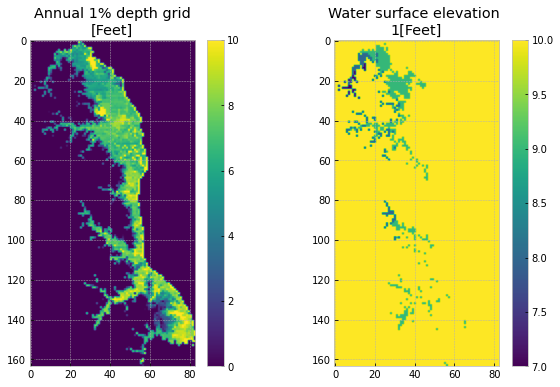

In [17]:
# -- plot raster 
fig, ax = plt.subplots(1, 2, figsize=[10, 6])
im0 = ax[0].imshow(arr1C_Cst_Dpth01pct [::100, ::100].clip(0,10))
im1 = ax[1].imshow(arr1C_Cst_WSE_01pct [::100, ::100].clip(0,10))

ax[0].set_title("Annual 1% depth grid\n[Feet]")
ax[1].set_title("Water surface elevation \n1[Feet]")

fig.colorbar(im0, ax=ax[0])
fig.colorbar(im1, ax=ax[1])

In [18]:
fdat = np.random.randn(100, 350)

In [19]:
fdat.shape

(100, 350)

In [20]:
fdat[50, 100]

-0.42187383617465757

In [21]:
lats = np.linspace(-50, -12, 350)


In [22]:
lats

array([-50.        , -49.89111748, -49.78223496, -49.67335244,
       -49.56446991, -49.45558739, -49.34670487, -49.23782235,
       -49.12893983, -49.02005731, -48.91117479, -48.80229226,
       -48.69340974, -48.58452722, -48.4756447 , -48.36676218,
       -48.25787966, -48.14899713, -48.04011461, -47.93123209,
       -47.82234957, -47.71346705, -47.60458453, -47.49570201,
       -47.38681948, -47.27793696, -47.16905444, -47.06017192,
       -46.9512894 , -46.84240688, -46.73352436, -46.62464183,
       -46.51575931, -46.40687679, -46.29799427, -46.18911175,
       -46.08022923, -45.9713467 , -45.86246418, -45.75358166,
       -45.64469914, -45.53581662, -45.4269341 , -45.31805158,
       -45.20916905, -45.10028653, -44.99140401, -44.88252149,
       -44.77363897, -44.66475645, -44.55587393, -44.4469914 ,
       -44.33810888, -44.22922636, -44.12034384, -44.01146132,
       -43.9025788 , -43.79369628, -43.68481375, -43.57593123,
       -43.46704871, -43.35816619, -43.24928367, -43.14

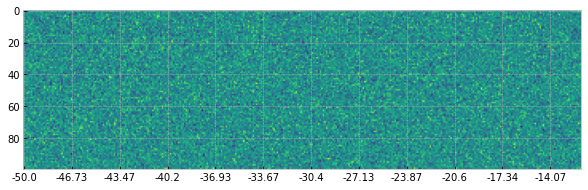

In [23]:
fig, ax = plt.subplots(figsize=[10, 3])
ax.imshow(fdat)
dum = ax.set_xticks(np.arange(0, 350, 30))
dum = ax.set_xticklabels(lats[np.arange(0, 350, 30)].round(2))

In [24]:
# -- look at shapes of rasters
print(arr1C_Cst_Dpth01pct.shape)
print(arr1C_Cst_Hillshade.shape)
print(arr1C_Cst_WSE_01pct.shape)

(16371, 8219)
(23396, 15514)
(16371, 8219)


In [25]:
more /content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Kent/FRD_10001C_Coastal_GeoTIFFS_20140502/10001C_Coastal_CstDpth01pct.tif.xml

In [26]:
more /content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Kent/FRD_10001C_Coastal_GeoTIFFS_20140502/10001C_Coastal_FRD_metadata.xml

In [27]:
# -- read in the meta data file as list of strings
mname = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Kent/FRD_10001C_Coastal_GeoTIFFS_20140502/10001C_Coastal_FRD_metadata.xml"
fopen = open(mname, "r")
lines = [i for i in fopen]
fopen.close()

# -- get lat lon meta data
for line in lines:
  if "<westbc>" in line:
    westbc = float(line.split(">")[1].split("<")[0])
  elif "<eastbc>" in line:
    eastbc = float(line.split(">")[1].split("<")[0])
  elif "<northbc>" in line:
    northbc = float(line.split(">")[1].split("<")[0])
  elif "<southbc>" in line:
    southbc = float(line.split(">")[1].split("<")[0])
  elif "<latres>" in line:
    latres = float(line.split(">")[1].split("<")[0])
  elif "<longres>" in line:
    longres = float(line.split(">")[1].split("<")[0])
  elif "<altunits>" in line:
    altunits = line.split(">")[1].split("<")[0]

In [28]:
westbc, northbc, eastbc, southbc, latres, longres

(-80.920048,
 43.498941,
 -72.116593,
 35.81795,
 0.0174532925199433,
 0.0174532925199433)

In [29]:
(northbc - southbc) / longres

440.08836677796955

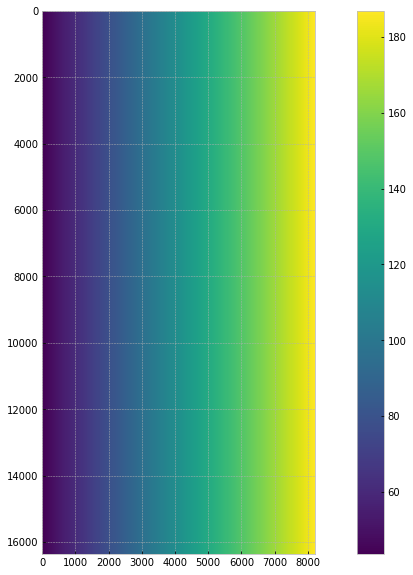

In [30]:
# -- create lat and lon arrays

# -- get number of rows and cols
nrows, ncols = arr1C_Cst_Dpth01pct.shape

# -- define upperleft and resolution
ul_r = westbc
ul_c = northbc
dr   = longres
dc   = latres

# -- generate a grid of row and col indices
cols, rows = np.meshgrid(np.arange(ncols), np.arange(nrows))

rco = ul_r + rows * dr
cco = ul_c + cols * dc

plt.imshow(cco)
plt.colorbar()

# plt.hist(np.log10(arr1C_Cst_Dpth01pct[arr1C_Cst_Dpth01pct > 0]))

In [31]:
ul_r = 2
ul_c = 15
dr = 0.5
dc = 0.25
nrows = 10
ncols = 3

cols, rows = np.meshgrid(np.arange(ncols), np.arange(nrows))

rco = ul_r + rows * dr
cco = ul_c + cols * dc

print(rco)

[[2.  2.  2. ]
 [2.5 2.5 2.5]
 [3.  3.  3. ]
 [3.5 3.5 3.5]
 [4.  4.  4. ]
 [4.5 4.5 4.5]
 [5.  5.  5. ]
 [5.5 5.5 5.5]
 [6.  6.  6. ]
 [6.5 6.5 6.5]]


In [32]:
nx, ny = (3,2)
x = np.linspace(0,1, nx)
y= np.linspace(0,1, ny)
xv, yv = np.meshgrid(x,y)
xv

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

In [33]:
arr1C_Cst_Dpth01pct = rast1C_Cst_Dpth01pct.ReadAsArray()
arr1C_Cst_Dpth01pct

array([[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       ...,
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38]], dtype=float32)

(array([   34789.,   108279.,   162675.,   413500.,   776368.,  1363337.,
         3010137., 19852181.,  2997967.,   659444.]),
 array([-1.        , -0.75512934, -0.51025873, -0.26538807, -0.02051744,
         0.2243532 ,  0.46922383,  0.71409446,  0.9589651 ,  1.2038357 ,
         1.4487064 ], dtype=float32),
 <a list of 10 Patch objects>)

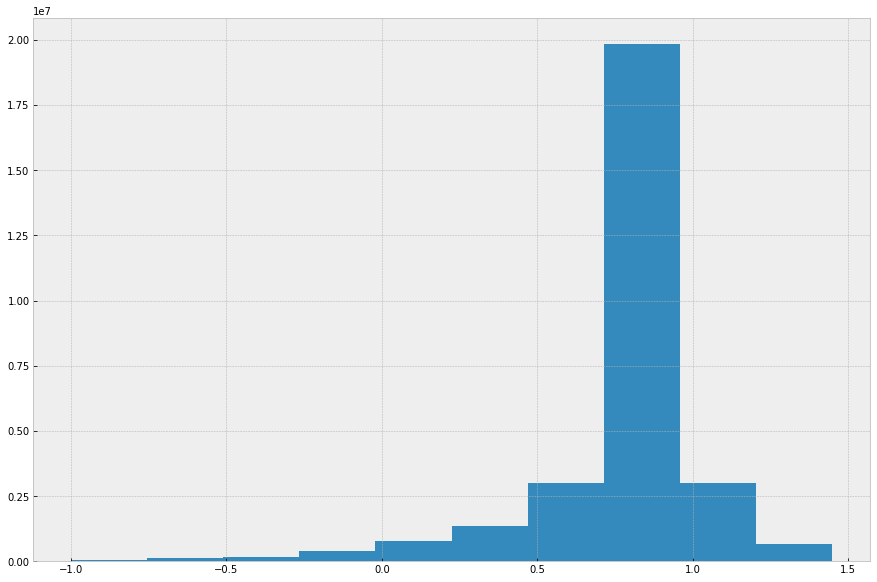

In [34]:
# Folder: FRD_10001C_Coastal_GeoTIFFS_20140502

# <westbc>-80.920048</westbc>
# <eastbc>-72.116593</eastbc>
# <northbc>43.498941</northbc>
# <southbc>35.817950</southbc>

#<latres>0.017453292519943299</latres>
#<longres>0.017453292519943299</longres>
#<geogunit>Decimal degrees</geogunit>

#<altres>0.0001</altres>
#<altunits>feet</altunits>

ul_r = -80.920048
ul_c = 43.498941
dr = 0.017453292519943299
dc = 0.017453292519943299

cols, rows = np.meshgrid(np.arange(-80.920048, -72.116593, 0.017453292519943299), np.arange(35.817950, 43.49894, 0.017453292519943299), sparse =True)

rco = ul_r + rows * dr
cco = ul_c + cols * dc

plt.hist(np.log10(arr1C_Cst_Dpth01pct[arr1C_Cst_Dpth01pct > 0]))

### **Non-Coastal Area of Kent(10001C_GeoTIFFS)**

In [35]:
# -- set filename

# Folder: FRD_10001C_GeoTIFFS_20160331
fname1C_Depth_01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Kent/FRD_10001C_GeoTIFFS_20160331/FRD_10001C_GeoTIFFS_20160331/Depth_01pct.tif"
fname1C_WSE_01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Kent/FRD_10001C_GeoTIFFS_20160331/FRD_10001C_GeoTIFFS_20160331/WSE_01pct.tif"


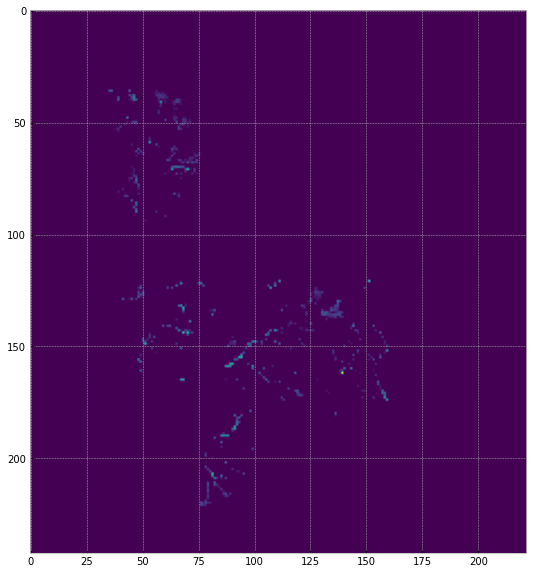

In [36]:
# -- create and read in a raster
rast1C_Depth_01pct = gdal.Open(fname1C_Depth_01pct, GA_ReadOnly)
rast1C_WSE_01pct = gdal.Open(fname1C_WSE_01pct, GA_ReadOnly)

# -- extract raster to array
arr1C_Depth_01pct = rast1C_Depth_01pct.ReadAsArray()
arr1C_WSE_01pct = rast1C_WSE_01pct.ReadAsArray()

# -- plot raster 
plt.imshow(arr1C_Depth_01pct [::100, ::100].clip(0,10))
plt.imshow(arr1C_WSE_01pct [::100, ::100].clip(0,10))

# Depth01pct
plt.imshow(arr1C_Depth_01pct [::100, ::100].clip(0,10))

In [37]:
arr1C_Depth_01pct.shape
arr1C_WSE_01pct.shape

(24291, 22102)

(array([2.236720e+05, 5.160910e+05, 5.510320e+05, 1.316976e+06,
        1.611702e+06, 1.353052e+06, 6.408360e+05, 9.439600e+04,
        1.426000e+03, 9.198000e+03]),
 array([-1.        , -0.7473661 , -0.49473214, -0.24209821,  0.01053572,
         0.26316965,  0.5158036 ,  0.7684375 ,  1.0210714 ,  1.2737054 ,
         1.5263393 ], dtype=float32),
 <a list of 10 Patch objects>)

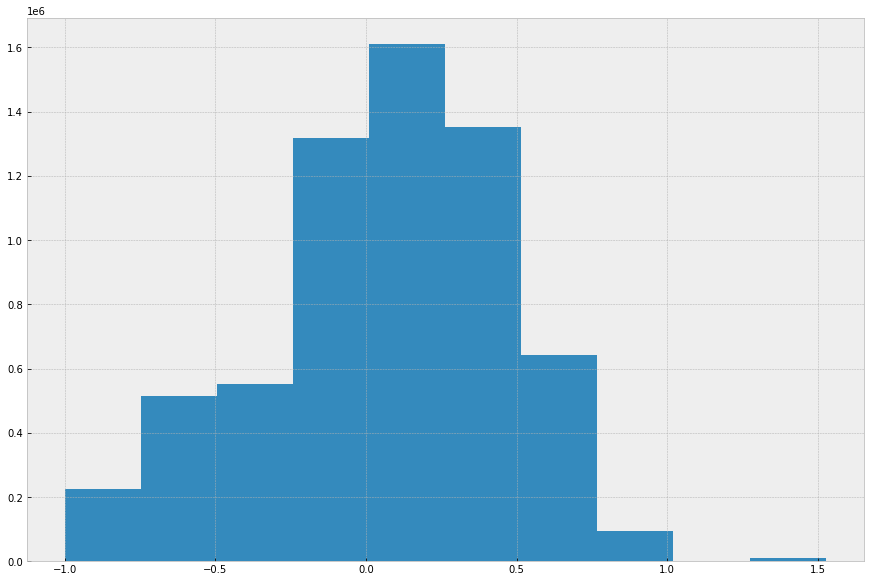

In [38]:
# Folder: FRD_10003C_Coastal_GeoTIFFS_20140502

# <westbc>-80.920048</westbc>
# <eastbc>-72.116593</eastbc>
# <northbc>43.498941</northbc>
# <southbc>35.817950</southbc>

#<latres>0.017453292519943299</latres>
#<longres>0.017453292519943299</longres>
#<geogunit>Decimal degrees</geogunit>

#<altres>0.0001</altres>
#<altunits>feet</altunits>

ul_r = -80.920048
ul_c = 43.498941
dr = 0.017453292519943299
dc = 0.017453292519943299

cols, rows = np.meshgrid(np.arange(5), np.arange(10))
rco = ul_r + rows * dr
cco = ul_c + cols * dc

plt.hist(np.log10(arr1C_Depth_01pct[arr1C_Depth_01pct > 0]))


## **New Castle(10003C)**

### **Coastal Area of New Castle (10003C_Coastal_GeoTIFFS)**

In [40]:
# -- set filename

# Folder: FRD_10003C_Coastal_GeoTIFFS_20140516
fname3C_Cst_Dpth01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_10003C_Coastal_GeoTIFFS_20140516/10003C_Coastal_CstDpth01pct.tif"
fname3C_Cst_WSE_01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_10003C_Coastal_GeoTIFFS_20140516/10003C_Coastal_WSE_01pct.tif"

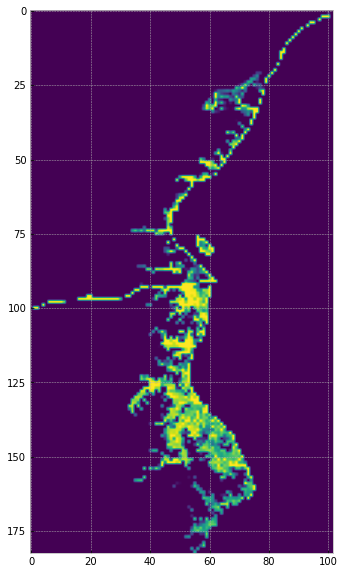

In [41]:
# -- create and read in a raster
rast3C_Cst_Dpth01pct = gdal.Open(fname3C_Cst_Dpth01pct, GA_ReadOnly)
rast3C_Cst_WSE_01pct = gdal.Open(fname3C_Cst_WSE_01pct , GA_ReadOnly)

# -- extract raster to array
arr3C_Cst_Dpth01pct = rast3C_Cst_Dpth01pct.ReadAsArray()
arr3C_Cst_WSE_01pct = rast3C_Cst_WSE_01pct.ReadAsArray()

# -- plot raster 
plt.imshow(arr3C_Cst_Dpth01pct [::100, ::100].clip(0,10))
plt.imshow(arr3C_Cst_WSE_01pct [::100, ::100].clip(0,10))

# Depth01pct
plt.imshow(arr3C_Cst_Dpth01pct [::100, ::100].clip(0,10))

In [43]:
arr3C_Cst_Dpth01pct.shape
arr3C_Cst_WSE_01pct.shape

(18244, 10134)

(array([  23455.,   58687.,  157426.,  317802.,  788007., 1754323.,
        7178650., 3035756.,  332055.,  300180.]),
 array([-1.        , -0.71438754, -0.4287751 , -0.14316264,  0.14244981,
         0.42806226,  0.7136747 ,  0.9992872 ,  1.2848996 ,  1.570512  ,
         1.8561245 ], dtype=float32),
 <a list of 10 Patch objects>)

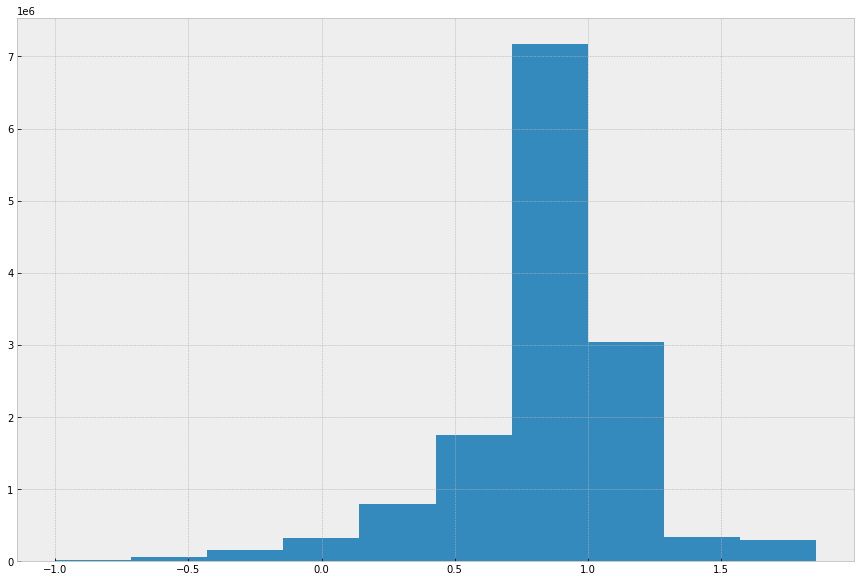

In [44]:
# Folder: FRD_10005C_Coastal_GeoTIFFS_20140502

# <westbc>-80.920048</westbc>
# <eastbc>-72.116593</eastbc>
# <northbc>43.498941</northbc>
# <southbc>35.817950</southbc>

#<latres>0.017453292519943299</latres>
#<longres>0.017453292519943299</longres>
#<geogunit>Decimal degrees</geogunit>

#<altres>0.0001</altres>
#<altunits>feet</altunits>

ul_r = -80.920048
ul_c = 43.498941
dr = 0.017453292519943299
dc = 0.017453292519943299

cols, rows = np.meshgrid(np.arange(5), np.arange(10))
rco = ul_r + rows * dr
cco = ul_c + cols * dc

plt.hist(np.log10(arr3C_Cst_Dpth01pct[arr3C_Cst_Dpth01pct > 0]))

### **Non-Coastal Area of New Castle (10003C_GeoTIFFS)**

In [45]:
# -- set filename

# Folder: FRD_0204205_Geotiffs_20170801

# Pct depth 01pct
fname3C_1pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/depth_01PCT.tif"
fname3C_1pct2 = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/depth_01pct_NewCastle.tif"
# Pct depth 02pct
fname3C_2pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/depth_02PCT.tif"
fname3C_2pct2 = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/depth_02pct_NewCastle.tif"
# Pct depth 04oct
fname3C_4pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/depth_04PCT.tif"
fname3C_4pct2 = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/depth_04pct_NewCastle.tif"

# depth_0_2pct 
fname3C_0_2pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/depth_0_2PCT.tif"
fname3C_0_2pct2 = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/depth_0_2pct_NewCastle.tif"
# depth_10pct
fname3C_10pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/depth_10PCT.tif"
fname3C_10pct2 = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/depth_10pct_NewCastle.tif"

# Pct 30year chance 
fname3C_30y = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/Pct30YrChance.tif"
# Pct Ann Chance
fname3C_ann = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/PctAnnChance.tif"
# pct 30 yr chance in Newark
fname3C_30yr = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/pct30yrchance_NewCastle.tif"
# pct ann chance in Newark
fname3C_annc = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/pctannchance_NewCastle.tif"

# WSE 01 pct
fname3C_wse01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/wse_01PCT.tif"
fname3C_wse01pct2 = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/wse_01pct_NewCastle.tif"
# WSE 02 pct 
fname3C_wse02pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/wse_02PCT.tif"
fname3C_wse02pct2 = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/wse_02pct_NewCastle.tif"
# WSE 04 pct
fname3C_wse04pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/wse_04PCT.tif"
fname3C_wse04pct2 = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/wse_04pct_NewCastle.tif"
# WSE_0_2PCT
fname3C_wse_0_2pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/wse_0_2PCT.tif"
fname3C_wse_0_2pct2 = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/wse_0_2pct_NewCastle.tif"
# WSE_10PCT
fname3C_wse_10pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/wse_10PCT.tif"
fname3C_wse_10pct2 = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_02040205_Geotiffs_20170801/FRD_02040205_Geotiffs/wse_10pct_NewCastle.tif"



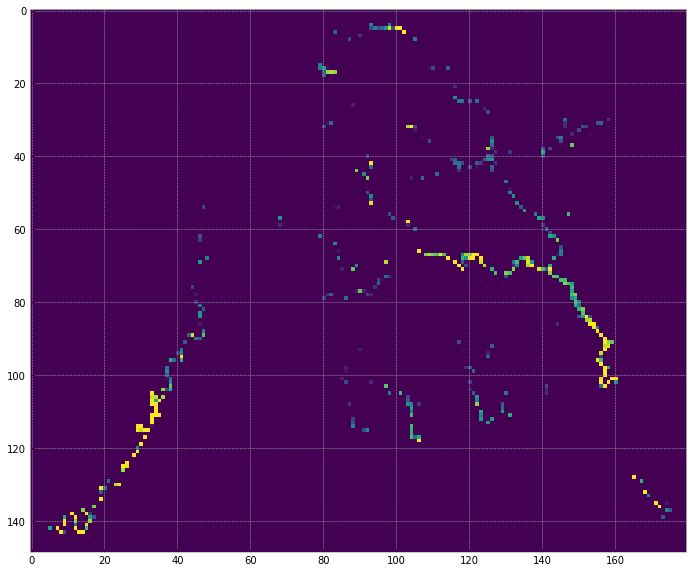

In [46]:
# Pct depth 01pct

# -- create and read in a raster
rast3C_1pct = gdal.Open(fname3C_1pct, GA_ReadOnly)

# -- extract raster to array
arr3C_1pct = rast3C_1pct.ReadAsArray()

# -- plot raster 
plt.imshow(arr3C_1pct [::100, ::100].clip(0,10))


In [47]:
arr3C_1pct.shape

(14811, 17912)

## **Sussex (10005C)**

### **Coastal Area of Sussex (10005C_Coastal_GeoTIFFS)**

In [49]:
# -- set filename

# Folder: FRD_10005C_Coastal_GeoTIFFS_20140509
fname5C_Cst_Dpth01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Sussex/FRD_10005C_Coastal_GeoTIFFS_20140509/10005C_Coastal_CstDpth01pct.tif"
fname5C_Cst_WSE_01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Sussex/FRD_10005C_Coastal_GeoTIFFS_20140509/10005C_Coastal_WSE_01pct.tif"


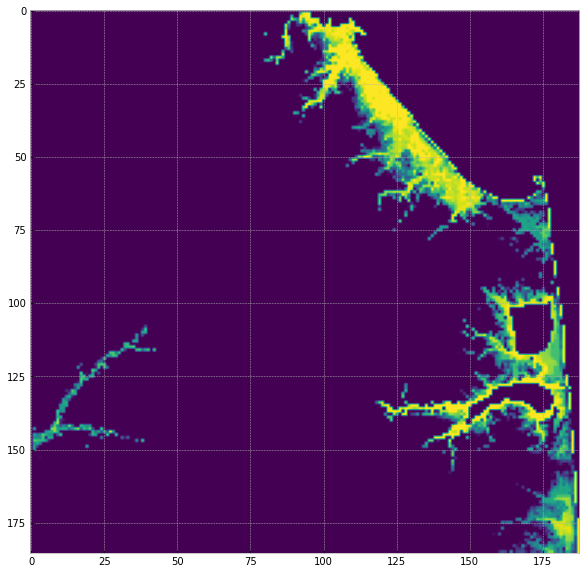

In [50]:
# -- create and read in a raster
rast5C_Cst_Dpth01pct = gdal.Open(fname5C_Cst_Dpth01pct, GA_ReadOnly)
rast5C_Cst_WSE_01pct = gdal.Open(fname5C_Cst_WSE_01pct , GA_ReadOnly)

# -- extract raster to array
arr5C_Cst_Dpth01pct = rast5C_Cst_Dpth01pct.ReadAsArray()
arr5C_Cst_WSE_01pct = rast5C_Cst_WSE_01pct.ReadAsArray()

# -- plot raster 
plt.imshow(arr5C_Cst_Dpth01pct [::100, ::100].clip(0,10))
plt.imshow(arr5C_Cst_WSE_01pct [::100, ::100].clip(0,10))

# Depth01pct
plt.imshow(arr5C_Cst_Dpth01pct [::100, ::100].clip(0,10))

In [51]:
arr5C_Cst_Dpth01pct.shape
arr5C_Cst_WSE_01pct.shape

(18591, 18750)

(array([   83007.,   213089.,   609164.,  1500346.,  2985871.,  7610040.,
        19220604.,  2651623.,   181960.,    20917.]),
 array([-1.        , -0.70545316, -0.41090629, -0.11635944,  0.17818742,
         0.47273427,  0.7672811 ,  1.061828  ,  1.3563749 ,  1.6509217 ,
         1.9454685 ], dtype=float32),
 <a list of 10 Patch objects>)

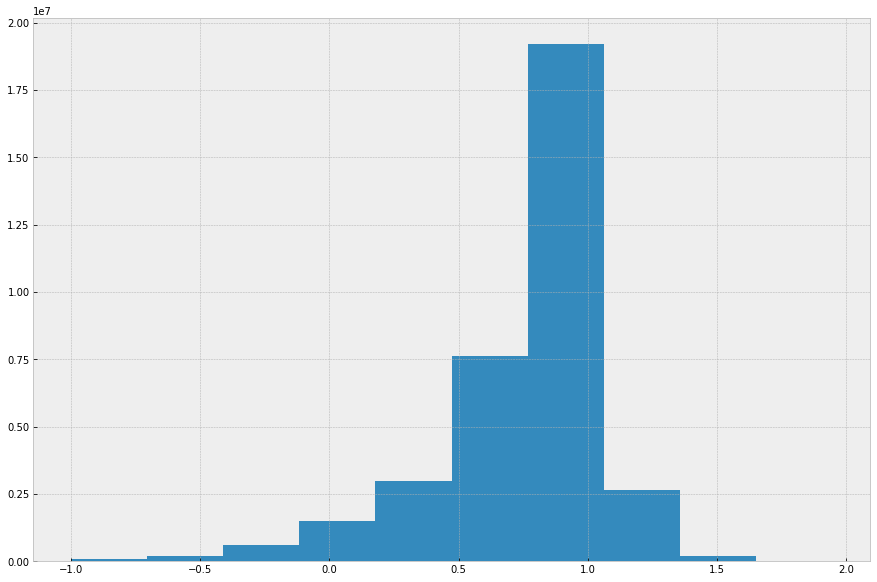

In [52]:
# Folder: FRD_10005C_Coastal_GeoTIFFS_20140502

# <westbc>-80.920048</westbc>
# <eastbc>-72.116593</eastbc>
# <northbc>43.498941</northbc>
# <southbc>35.817950</southbc>

#<latres>0.017453292519943299</latres>
#<longres>0.017453292519943299</longres>
#<geogunit>Decimal degrees</geogunit>

#<altres>0.0001</altres>
#<altunits>feet</altunits>

ul_r = -80.920048
ul_c = 43.498941
dr = 0.017453292519943299
dc = 0.017453292519943299

cols, rows = np.meshgrid(np.arange(5), np.arange(10))
rco = ul_r + rows * dr
cco = ul_c + cols * dc

plt.hist(np.log10(arr5C_Cst_Dpth01pct[arr5C_Cst_Dpth01pct > 0]))

### **Non-Coastal Area of Susex (10005C_GeoTIFFS)**

In [6]:
# -- set filename

# Folder: FRD_10005C_GeoTIFFS_20160331

# Depth_01pct
fname5C_Depth_01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Sussex/FRD_10005C_GeoTIFFS_20160331/FRD_10005C_GeoTIFFS_20160331/Depth_01pct.tif"

# WSE_01pct
fname5C_WSE_01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Sussex/FRD_10005C_GeoTIFFS_20160331/FRD_10005C_GeoTIFFS_20160331/WSE_01pct.tif"


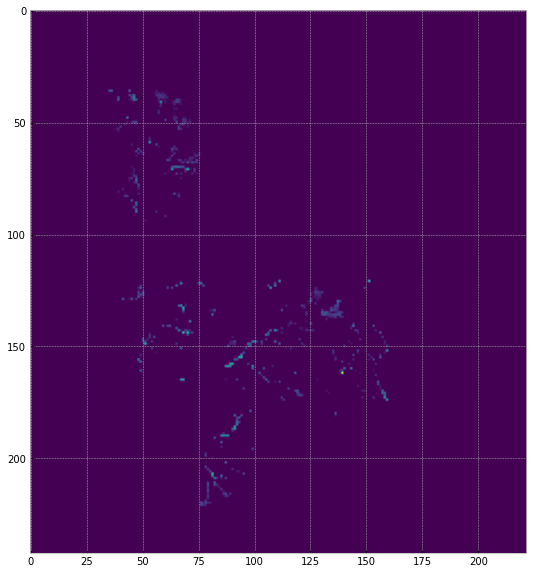

In [7]:
# -- create and read in a raster
rast5C_Depth_01pct = gdal.Open(fname5C_Depth_01pct, GA_ReadOnly)
rast5C_WSE_01pct = gdal.Open(fname5C_WSE_01pct, GA_ReadOnly)

# -- extract raster to array
arr5C_Depth_01pct = rast5C_Depth_01pct.ReadAsArray()
arr5C_WSE_01pct = rast5C_WSE_01pct.ReadAsArray()

# -- plot raster 
plt.imshow(arr5C_Depth_01pct [::100, ::100].clip(0,10))
plt.imshow(arr5C_WSE_01pct [::100, ::100].clip(0,10))

# Depth01pct
plt.imshow(arr5C_Depth_01pct [::100, ::100].clip(0,10))


In [8]:
arr5C_Depth_01pct.shape
arr5C_WSE_01pct.shape

(24291, 22102)